In [1]:
from utils import plot_similarity_histogram, get_tanimoto_similarity_triangle, plot_histogram_with_two_y_axes, get_actives_inactives_similarity_flat, scaffold_dataset_splitter
import pandas as pd

2024-09-25 13:23:33.339080: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 13:23:33.403019: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 13:23:33.403077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 13:23:33.404782: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 13:23:33.414011: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 13:23:33.414886: I tensorflow/core/platform/cpu_feature_guard.cc:1

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# Dataset filtrado general

In [2]:
df = pd.read_pickle("../data/raw/data_chembl34_filtrada_02_09_24.pkl")

# Armado de dataset


In [3]:
target = "CHEMBL2581"
df_target = df[df.target == target]
df_target

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity
5000,171422,CHEMBL104783,10003,45159,CHEMBL2581,=,110.0,nM,IC50,0,...,0.08,765.4101,C44H55N5O7,12.0,6.0,3.0,-0.23,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,Homo sapiens,1
5152,171726,CHEMBL104966,10003,45159,CHEMBL2581,=,60.0,nM,IC50,0,...,0.08,749.4152,C44H55N5O6,11.0,6.0,4.0,-0.03,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,Homo sapiens,1
8563,614433,CHEMBL1076901,10003,615091,CHEMBL2581,=,41.0,nM,IC50,0,...,0.08,813.3771,C44H55N5O8S,13.0,5.0,2.0,-0.60,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,Homo sapiens,1
8565,614434,CHEMBL1076902,10003,615091,CHEMBL2581,=,210.0,nM,IC50,0,...,0.08,849.3583,C44H53F2N5O8S,13.0,5.0,3.0,-0.75,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,Homo sapiens,1
8569,614435,CHEMBL1076905,10003,615091,CHEMBL2581,=,59.0,nM,IC50,0,...,0.09,835.3426,C43H51F2N5O8S,13.0,5.0,2.0,-0.70,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,Homo sapiens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282696,154901,CHEMBL96943,10003,45170,CHEMBL2581,=,560.0,nM,Ki,0,...,0.12,565.3516,C33H47N3O5,8.0,4.0,1.0,0.40,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,Homo sapiens,1
1282775,155435,CHEMBL97013,10003,45170,CHEMBL2581,=,50.0,nM,Ki,0,...,0.27,511.3410,C30H45N3O4,7.0,4.0,1.0,0.03,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,Homo sapiens,1
1282830,155910,CHEMBL97072,10003,45170,CHEMBL2581,=,200.0,nM,Ki,0,...,0.17,549.3203,C32H43N3O5,8.0,4.0,1.0,0.18,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,Homo sapiens,1
1283531,156030,CHEMBL97805,10003,45170,CHEMBL2581,=,2100.0,nM,Ki,0,...,0.27,525.3203,C30H43N3O5,8.0,4.0,1.0,-0.27,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,Homo sapiens,1


In [4]:
df_target[df_target.duplicated(subset="comp_id")]

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity


# Estudio de diversidad quimica de compuestos

100%|██████████| 2253/2253 [00:30<00:00, 73.51it/s] 


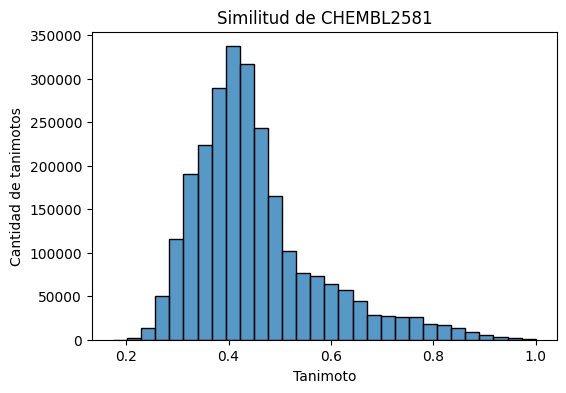

In [5]:
similarity_triangle = get_tanimoto_similarity_triangle(df_target)
plot_similarity_histogram(similarity_triangle,target)

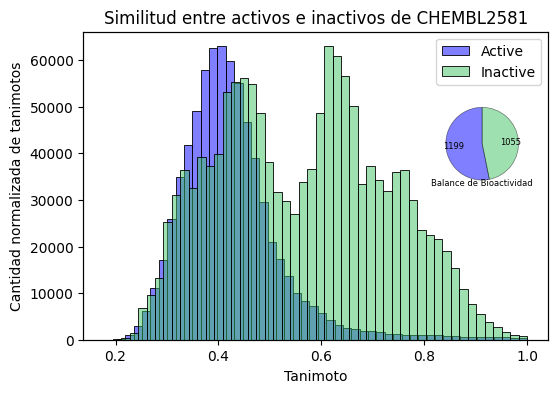

In [8]:
actives, inactives = get_actives_inactives_similarity_flat(df_target, similarity_triangle)

plot_histogram_with_two_y_axes(actives,inactives,df_target,target,position_pie=(0.69,0.5,0.2,0.2),pie_text=6)

splitting

In [7]:
dataset_splited = scaffold_dataset_splitter(df_target)

dataset_splited.to_csv(f"../data/processed/{target}_chemblv34.csv",index=False)